In [185]:
# Build a machine learning model to predict whether a person makes over 50K a year or not

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
dataframe = pd.read_csv('Data/classification_2.csv')

In [188]:
dataframe.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [189]:
dataframe.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [190]:
# as there were spaces in the cloumn names we had to remove the spaces form the column names
dataframe.columns = dataframe.columns.str.strip()

In [191]:
dataframe = dataframe.drop(['Never-married', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [192]:
new_columns = {'<=50K':'y'}
dataframe.rename(columns=new_columns, inplace=True)

In [193]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 8 columns):
39           32560 non-null int64
State-gov    32560 non-null object
77516        32560 non-null int64
13           32560 non-null int64
2174         32560 non-null int64
0            32560 non-null int64
40           32560 non-null int64
y            32560 non-null object
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


In [194]:
dataframe.y = dataframe.y.str.strip()

In [195]:
(dataframe.isna()).sum()

39           0
State-gov    0
77516        0
13           0
2174         0
0            0
40           0
y            0
dtype: int64

In [196]:
dataframe.head()

,39,State-gov,77516,13,2174,0,40,y
0,50,Self-emp-not-inc,83311,13,0,0,13,<=50K
1,38,Private,215646,9,0,0,40,<=50K
2,53,Private,234721,7,0,0,40,<=50K
3,28,Private,338409,13,0,0,40,<=50K
4,37,Private,284582,14,0,0,40,<=50K


In [197]:
dataframe = pd.concat((dataframe, pd.get_dummies(dataframe['State-gov'])),1)
column=['State-gov']
dataframe = dataframe.drop(column,axis=1)

In [198]:
dataframe.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,0,0,13,<=50K,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,0,1,0,0,0,0


In [199]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0
?,32560.0,0.056388,0.230673,0.0,0.0,0.0,0.0,1.0
Federal-gov,32560.0,0.029484,0.169161,0.0,0.0,0.0,0.0,1.0
Local-gov,32560.0,0.064281,0.245257,0.0,0.0,0.0,0.0,1.0
Never-worked,32560.0,0.000215,0.014661,0.0,0.0,0.0,0.0,1.0


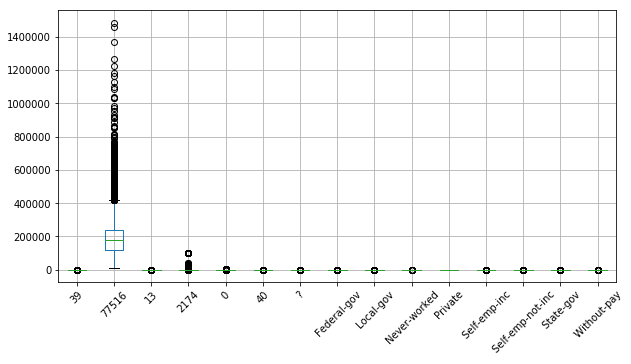

In [200]:
dataframe.boxplot(rot=45, figsize=(10,5))

In [201]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
39                   32560 non-null int64
77516                32560 non-null int64
13                   32560 non-null int64
2174                 32560 non-null int64
0                    32560 non-null int64
40                   32560 non-null int64
y                    32560 non-null object
 ?                   32560 non-null uint8
 Federal-gov         32560 non-null uint8
 Local-gov           32560 non-null uint8
 Never-worked        32560 non-null uint8
 Private             32560 non-null uint8
 Self-emp-inc        32560 non-null uint8
 Self-emp-not-inc    32560 non-null uint8
 State-gov           32560 non-null uint8
 Without-pay         32560 non-null uint8
dtypes: int64(6), object(1), uint8(9)
memory usage: 2.0+ MB


In [202]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [203]:
column = ['77516','2174','13','39','40','0']
for item in column:
    dataframe[item] = dataframe[item].astype(float)
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

In [204]:
dataframe.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.837084,-1.008726,1.134761,-0.145911,-0.21666,-2.222086,<=50K,0,0,0,0,0,0,1,0,0
1,-0.042640,0.245043,-0.420020,-0.145911,-0.21666,-0.035429,<=50K,0,0,0,0,1,0,0,0,0
2,1.057015,0.425763,-1.197411,-0.145911,-0.21666,-0.035429,<=50K,0,0,0,0,1,0,0,0,0
3,-0.775743,1.408124,1.134761,-0.145911,-0.21666,-0.035429,<=50K,0,0,0,0,1,0,0,0,0
4,-0.115950,0.898156,1.523457,-0.145911,-0.21666,-0.035429,<=50K,0,0,0,0,1,0,0,0,0


In [205]:
dataframe.y = dataframe.y.replace({'<=50K': 0, '>50K': 1})
dataframe.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.837084,-1.008726,1.134761,-0.145911,-0.21666,-2.222086,0,0,0,0,0,0,0,1,0,0
1,-0.042640,0.245043,-0.420020,-0.145911,-0.21666,-0.035429,0,0,0,0,0,1,0,0,0,0
2,1.057015,0.425763,-1.197411,-0.145911,-0.21666,-0.035429,0,0,0,0,0,1,0,0,0,0
3,-0.775743,1.408124,1.134761,-0.145911,-0.21666,-0.035429,0,0,0,0,0,1,0,0,0,0
4,-0.115950,0.898156,1.523457,-0.145911,-0.21666,-0.035429,0,0,0,0,0,1,0,0,0,0


In [206]:
def split(dataframe):
    test_data = dataframe.tail(1000).reset_index(drop=True)
    # here we reset index as if the index remain same for accessing by index could be difficult
    return dataframe.head(len(dataframe)-1000).reset_index(), test_data.reset_index()

In [207]:
dataframe, test_data = split(dataframe)

In [208]:
class Logistic_Regression_Algo:
    
    def __init__(self):
        self.iteration=10000
        self.learning_rate = 0.001
        self.boundary = 0.5
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3,self.ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))

    def calculate_Z(self,weights,dataframe):
        return np.matmul(dataframe,weights.T)
        
    def calculate_G_of_Z(self,Z):
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz
    
    def loss(self,y,h_x):
        y_log_hx = np.multiply(y,np.log(h_x))
        _1_y_log_hx = np.multiply(np.subtract(1,y),np.log(np.subtract(1,h_x)))
        loss = np.divide(np.sum(np.add(y_log_hx,_1_y_log_hx)),-1*h_x.shape[0])
#         print('in loss ',y_log_hx.head(),_1_y_log_hx.head(),loss )
        return loss
    
    def Logistic_Regression_Algo_demo(self,dataframe):
        # weights of size n +1 as we'll add the bais at first
        weights = pd.Series(np.full(dataframe.shape[1],1.0)) # not n+1 as we'll be deleting the y column
        dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))
        train_y = dataframe.y
        dataframe = dataframe.drop('y',axis=1)
        # Its the bais
        weights [0] = 1.0
        for epochs in range(0,self.iteration):
            z = self.calculate_Z(dataframe,weights)
            h_x = self.calculate_G_of_Z(z)
            cost = self.loss(train_y,h_x)
            diff = np.subtract(h_x,train_y)
            # check for the matmul  it gives 1d array or not
            dw = np.divide(np.matmul(dataframe.T,diff),dataframe.shape[0])
            weights  = np.subtract(weights,np.multiply(dw,self.learning_rate))
            if epochs % 100 == 0:
                print('iteration: {}, cost: {}'.format(epochs,cost))
        plt.show()
        return weights
    
    def testing(self,test_data,weights):
        test_data.insert(loc=0, column='dummy', value=pd.Series(np.ones(test_data.shape[0])))
        test_y = np.array(dataframe.y)
        test_data = test_data.drop('y',axis=1)
        z = self.calculate_Z(weights,test_data)
        h_x = self.calculate_G_of_Z(z)
        Ypred =np.empty(test_data.shape[0])
        count = 0
        for i in range(0,test_data.shape[0]):
            if h_x[i]>self.boundary :
                Ypred[i]=1
            else:
                Ypred[i]=0
            if Ypred[i]==test_y[i]:
                count+=1
        accuracy  = count/test_data.shape[0]
        print("Accuracy",accuracy*100)

In [209]:
def main(dataframe,test_data):
    try:
        logistic = Logistic_Regression_Algo()
        weights = logistic.Logistic_Regression_Algo_demo(dataframe)
        logistic.testing(test_data,weights)
    except Exception as e:
        print("The process was stopped because of ",e)

C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in power
  
C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


iteration: 0, cost: inf
iteration: 100, cost: inf
iteration: 200, cost: inf
iteration: 300, cost: inf
iteration: 400, cost: inf
iteration: 500, cost: inf
iteration: 600, cost: inf


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

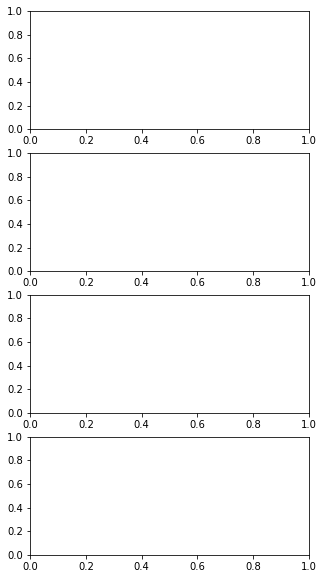

In [210]:
main(dataframe,test_data)
